<a href="https://colab.research.google.com/github/finaorivia19/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 – GLOBAL THRESHOLDING
*   Nama : Fina Orivia Nurfadillah
*   Absen : 08
*   NIM  : 2141720256





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install pytesseract

In [5]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2 as cv

**TUGAS NOMOR 3**
Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

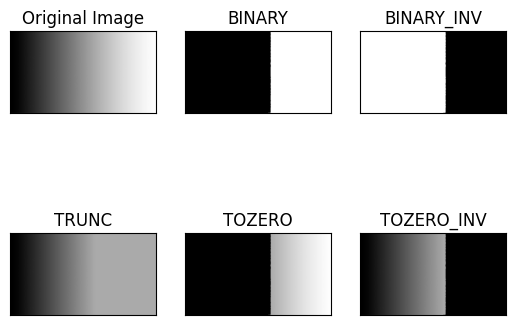

In [ ]:
filename_1 = ('/content/drive/MyDrive/image/gradient.jpg')

#menggunakan library
img_g = cv2.imread(filename_1)
ret,thresh1 = cv2.threshold(img_g,170,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_g,170,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_g,170,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_g,170,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_g,170,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i], 'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

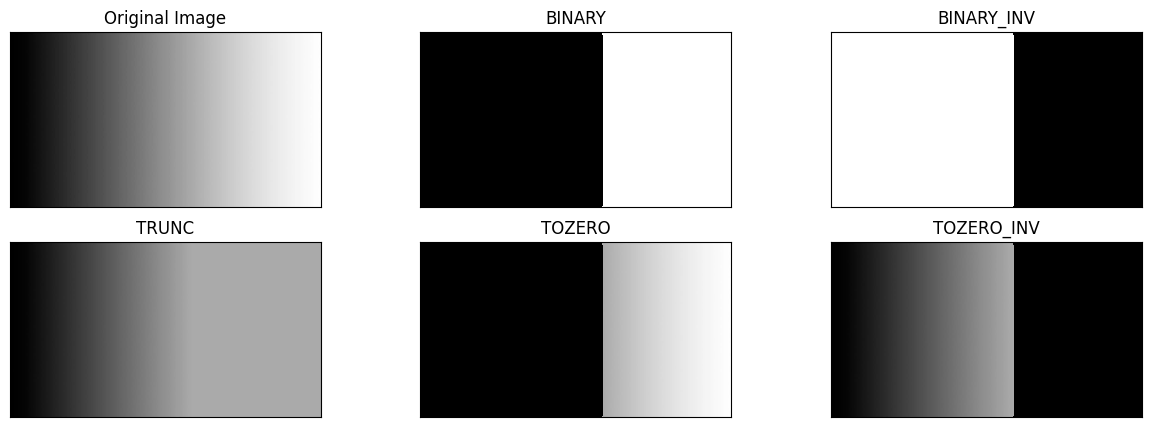

In [ ]:
#tanpa menggunakan library
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 170 #nilai threshold yang telah ditentukan

#Original image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#Binary threshold inverse
thresh2 = 255 - thresh1

#Threshold Truncate
thresh3[img_g>thresh] = thresh

#Threshold Tozero
thresh4[img_g<=thresh] = 0

#Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

**TUGAS NOMOR 4**
Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-9-0fa28b1cd59c>:28: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb
<ipython-input-9-0fa28b1cd59c>:29: RuntimeWarning: invalid value encountered in divide
  mf = (sumb - sumb) / wf


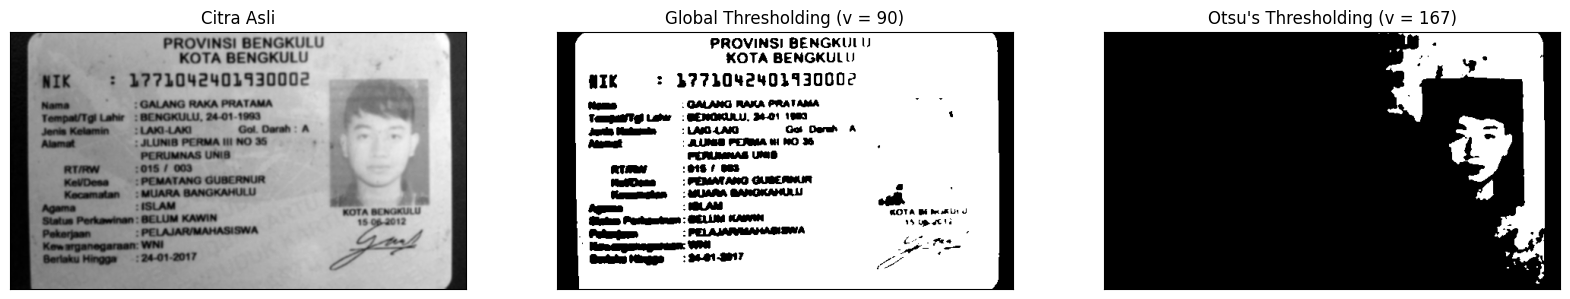

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#mengimpor gambar
filename_1 = ('/content/drive/MyDrive/image/ktp1.png')
img_lgs = cv2.imread(filename_1, 0)

#menggunakan gaussian blur
blur = cv2.GaussianBlur(img_lgs, (5, 5), 0)

#hitung histogram
hist = cv2.calcHist([blur], [0], None, [256], [0, 256])

hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0, 256):
    wb += hist[i]
    wf = (img_lgs.shape[0] * img_lgs.shape[1]) - wb
    sumb += (i * hist[i])
    mb = sumb / wb
    mf = (sumb - sumb) / wf
    betweenvar = wb * wf * (mb - mf) * (mb - mf)

    if (betweenvar > varmax):
      varmax = betweenvar
      thresh = i

#Ganti nilai threshold ke 167
thresh = 167

x = "Otsu's Thresholding (v = " + str(thresh) + ")"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(blur, thresh, 255, cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize=(20, 15))

for i in range(len(citra3)):
  plt.subplot(1,3,i+1)
  plt.imshow(citra3[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

**TUGAS NOMOR 5**
Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images. Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencv%02tutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

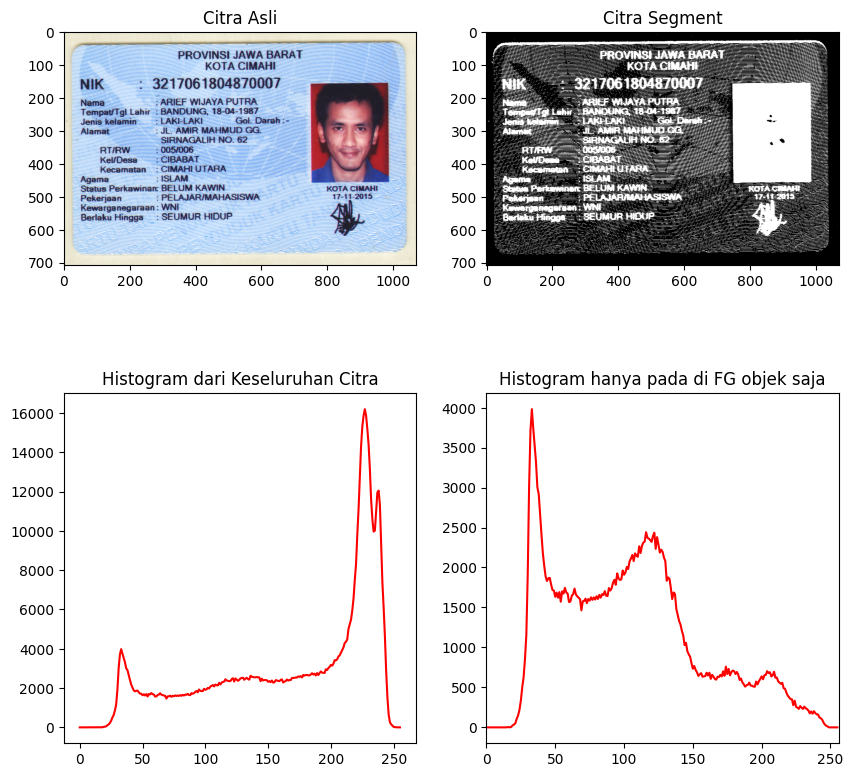

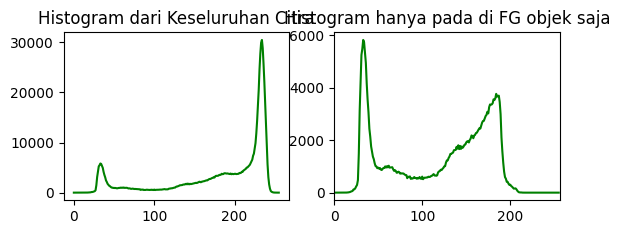

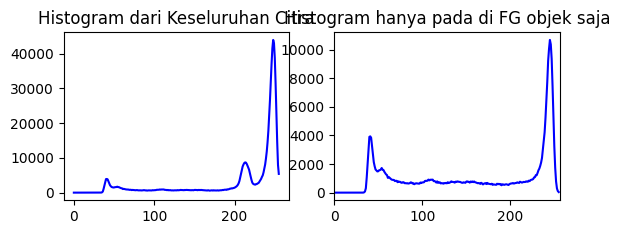

In [ ]:
#nomor5
filename_2 = ('/content/drive/MyDrive/image/ktp2.png')
img_1 = cv.imread(filename_2)
img_1 = cv.cvtColor(img_1,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_1)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
 hist0 = cv.calcHist([img_1],[i],None,[256],[0,256])
 plt.subplot(2,2,3),plt.plot(hist0,color = col)
 plt.title('Histogram dari Keseluruhan Citra')
 hist1 = cv.calcHist([img_1],[i],mask,[256],[0,256])
 plt.subplot(2,2,4),plt.plot(hist1,color = col)
 plt.title('Histogram hanya pada di FG objek saja')
 plt.xlim([0,256])
 plt.show()

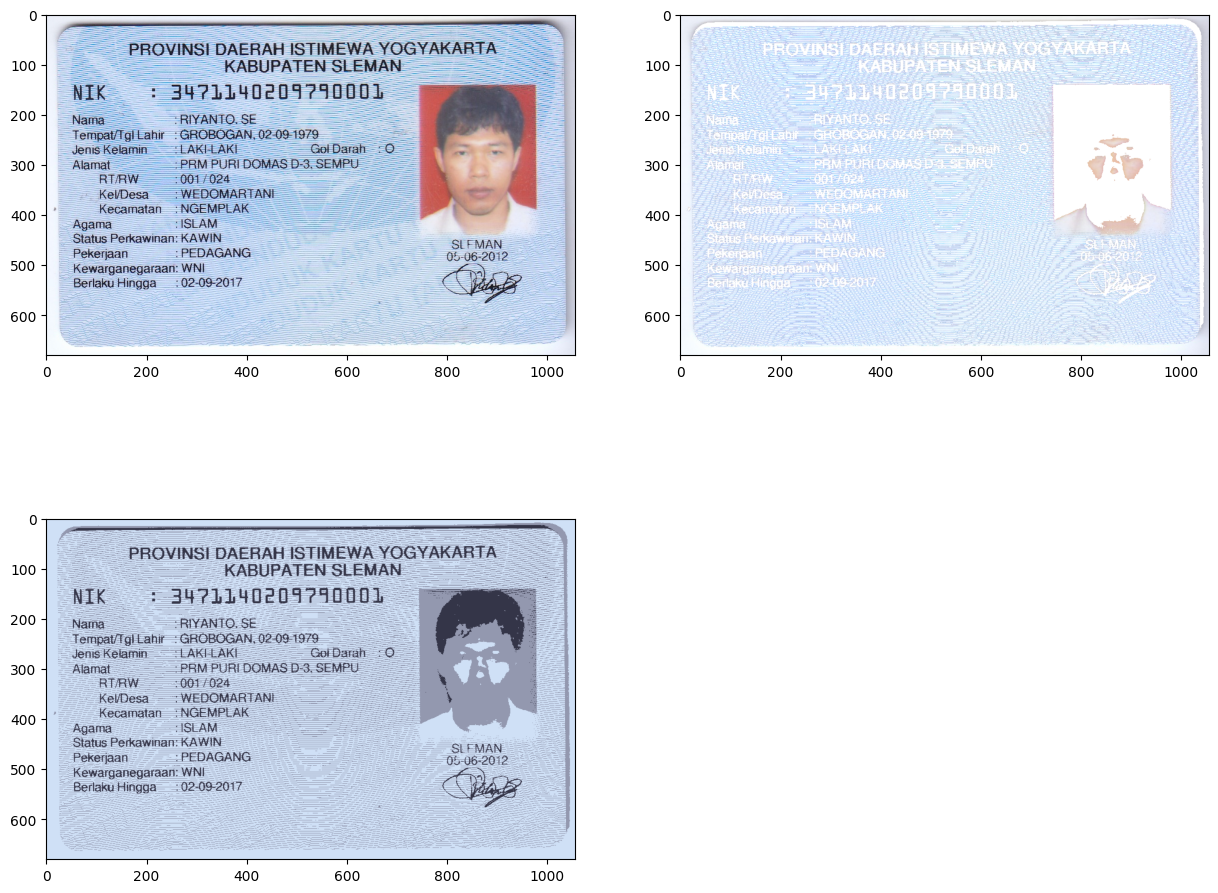

In [14]:
filename = ('/content/drive/MyDrive/image/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#ubah array menjadi 2D
pixel_values = img.reshape((-1, 3))
#ubah tipe data menjadi float
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k =3
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversikan titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna tiap centroidnya
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(masked_image0)
plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.show()

In [10]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 6 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 3s (1,927 kB/s)
debconf: unable to init

In [25]:
def display(img,cmap ='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


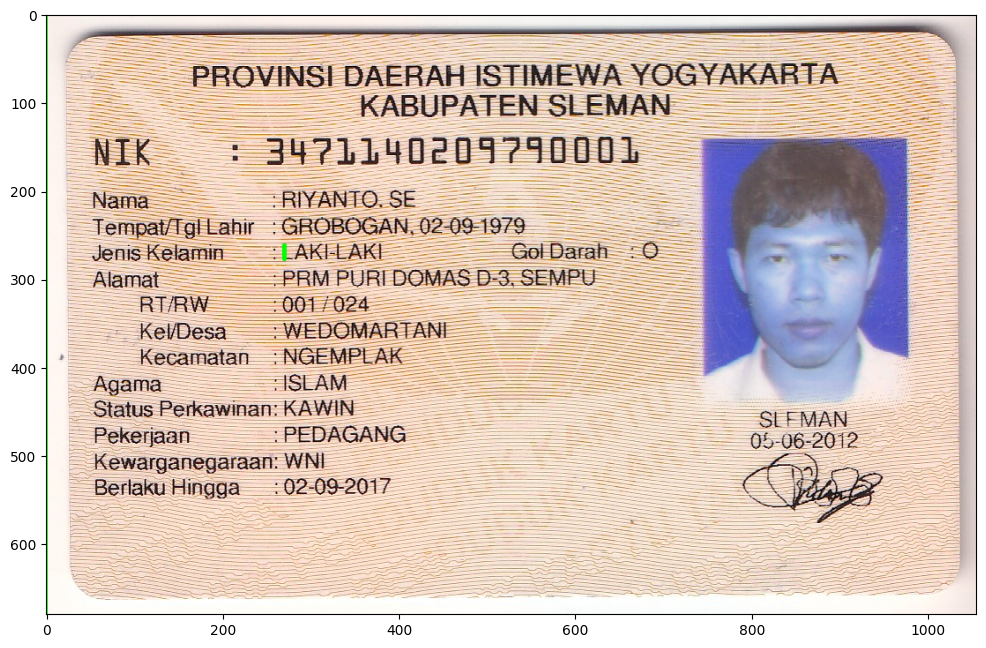

In [29]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/image/ktp.png')
text1 = pytesseract.image_to_data(img, output_type=Output.DICT)
print(text1.keys())

n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 50:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

:0VINSI DAERAH ISTIMEWA YOGYAKAR A
- KABUPATEN SLEMAN

Kel/Desa

     

Kecamatan -MPL
Agama "ISLAM
Status Perkawinan: KAWIN

Pekerjaan : PEDAGANG ' MA,
Kewarganegaraan: WNI
Berlaku Hingga :02-09-2017

 



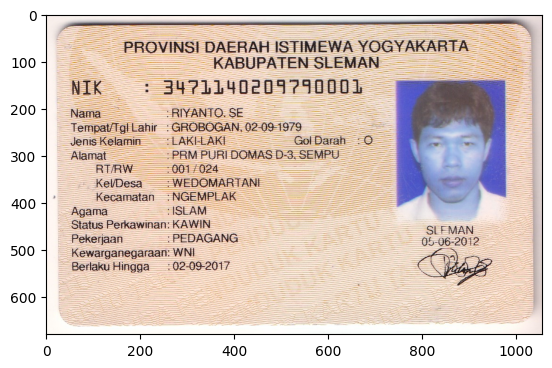

In [36]:
img = cv.imread('/content/drive/MyDrive/image/ktp.png')
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

R PROVINSI DAERAH ISTIMEWA YOGYAKAR
KABUPATEN SLEMAN  -

71240209290001 |

Kecamatan
Agama
Status Perkawinan: KAWIN ka - : STEMAN
Pekerjaan : PEDAGANG | . 05-06-2012
Kewarganegaraan: WNI. . 5
Berlaku Hingga "02-09-2017 . aa

S,

     



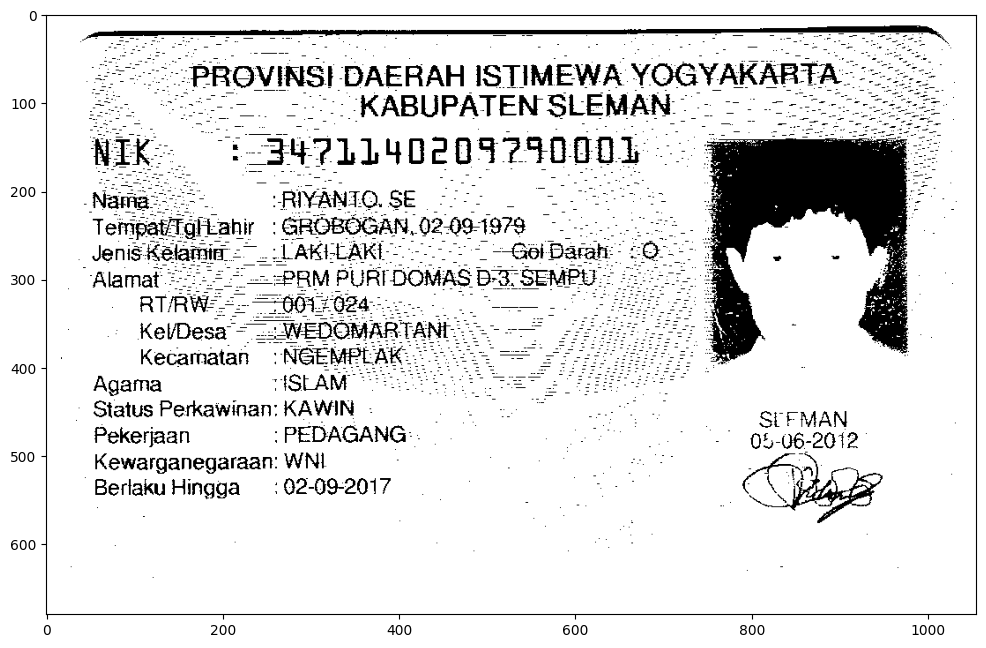

In [41]:
#definisi fungsi display
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap=cmap)

#membaca nilai citra ktp
img = cv.imread('/content/drive/MyDrive/image/ktp.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, threshed= cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

#Menampilkan hasil thresholding
display(threshed)
#Menggunakan tesseract OCR untuk membaca teks dari citra yang telah diolah
text = pytesseract.image_to_string(threshed, lang="ind")
#Menampilkan teks yang akan dibaca
print(text)